# Исследование данных о российском кинопрокате



# Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации.

Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.

Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Цель исследования** - провести исследование данных российского кинопроката, а именно: 
* Узнать сколько фильмов выходило в прокат каждый год и какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировать доли по годам.
* Проанализировать динамику проката по годам. 
* Посчитать и проанализировать среднюю и медианную сумму сборов для каждого года. 
* Проанализировать, как влияет возрастное ограничение аудитории на сборы фильма. 
* Проанализировать ситуацию на рынке проката для фильмов, получивших финансирование со стороны государства. 

# Описание данных

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.
* `box_office` — сборы в рублях.
Обратите внимание, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.


Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

Здесь стоит чуть глубже пояснить, что такое прокатное удостоверение фильма. 

***Прокатное удостоверение — документ, подтверждающий права владельца на фильм. Наличие прокатного удостоверения обязательно для публичных показов фильмов на территории РФ: некоммерческих показов в кинозалах (некоторые кинофестивали, киноклубы, премьеры), коммерческого проката в кинотеатрах, выпуска на физических носителях, показов фильма другими техническими способами.***

Уточнение по прокатному удостоверению я пишу уже изучив данные, тот факт, что прокатное удостоверение нужно получить для проката фильма, вне зависимости от коммерческого или некоммерческого показа говорит о том, что те фильмы, у которых есть прокатное удостоверение, но сборы равны нулю будем считать коммерческим провалом, а вот фильмы, у который пропуски в сборах будем считать некоммерческими показами. 

# Импорт библиотек и настроек

In [1]:
#импортируем бибилотеки
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
#устанавливаем настройки
warnings.simplefilter('ignore')
pd.set_option('float_format', '{:f}'.format)
pd.options.display.float_format = '{:,.2f}'.format

%config InlineBackend.figure_format = 'svg' 

rcParams['figure.figsize'] = 8, 4
sns.set_theme(style='whitegrid')

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [2]:
try:
    os.path.exists('/datasets/mkrf_movies.csv')
    os.path.exists('/datasets/mkrf_shows.csv')
    df_raw_movies = pd.read_csv('/datasets/mkrf_movies.csv', sep=',', decimal=',')
    df_raw_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    df_raw_movies = pd.read_csv('mkrf_movies.csv', sep=',', decimal=',')
    df_raw_shows = pd.read_csv('mkrf_shows.csv')
df_movies = df_raw_movies.copy()
df_shows = df_raw_shows.copy()

In [3]:
# Познакомимся с таблицей df_movies:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  7486 non-null   object
 1   puNumber               7486 non-null   object
 2   show_start_date        7486 non-null   object
 3   type                   7486 non-null   object
 4   film_studio            7468 non-null   object
 5   production_country     7484 non-null   object
 6   director               7477 non-null   object
 7   producer               6918 non-null   object
 8   age_restriction        7486 non-null   object
 9   refundable_support     332 non-null    object
 10  nonrefundable_support  332 non-null    object
 11  budget                 332 non-null    object
 12  financing_source       332 non-null    object
 13  ratings                6519 non-null   object
 14  genres                 6510 non-null   object
dtypes: object(15)
memory 

In [5]:
# Познакомимся с таблицей df_shows:
df_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [6]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Для того, чтобы объединить две таблички, нужен общий столбец. Он есть, и в `df_movies` и в `df_shows` это столбец `puNumber` — номер прокатного удостоверения. После метода `.info()` мы знаем, что в `df_movies` у столбца `puNumber` тип данных `object`, а в `df_show` у столбеца `puNumber` тип данных `int64`. 
Методом проб и ошибок удалось выяснить, что в `df_movies` у столбеца `puNumber` есть строка с значением `нет`. В таком случае переведем `puNumber` в `df_show` в `object`.

In [7]:
df_movies[df_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Нам нужно объединить две таблицы, объединять будем по puNumber, приведем его в таблице df_shows к
# типу данных `object`
df_shows['puNumber'] = df_shows['puNumber'].astype('str')
df_movies['puNumber'] = df_movies['puNumber'].astype('str')
# проверим: 
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [9]:
# Объединим две таблицы в новый датафрейм:
df = df_movies.merge(df_shows, how='left')
#Смотрим на получившийся датафрейм: 
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3730,Магазинчик самоубийств,124003216,2016-06-07T12:00:00.000Z,Художественный,"А Эр Пэ Селекцион, Карамель Фильм, Дьяболо Фил...",Франция - Канада - Бельгия,Патрис Леконт,"Тома Лангманн, Эммануэль Монтамат",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.2,"мультфильм,мюзикл,комедия",NaN
5171,Задание,121012111,2011-07-08T12:00:00.000Z,Художественный,Афтер Дарк Филмз,США,Алекс Оруэлл,"Кортни Соломон, Стефани Калеб, Лоурен Ито",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,4.9,ужасы,NaN
3716,Чудо на Гудзоне,121024016,2016-08-29T12:00:00.000Z,Художественный,"ФильмНэшн Интертейнмент, Флэшлайт Филмз, Кенне...",США,Клинт Иствуд,"Фрэнк Маршалл, Эллин Стюарт",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"драма,биография","152,082,035.70"
4049,Дневники нимфоманки,121003410,2010-02-26T12:00:00.000Z,Художественный,Фильмакс,Испания,Кристиан Молина,"Мариви Де Вильянуэва, КАрлос Фернандез",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.2,"драма,мелодрама",NaN
4424,Властелин колец: Возвращение короля /По произв...,221134210,2010-11-29T12:00:00.000Z,Художественный,"Нью Лайн Синема, Уингнат Филмз, Сол Заэнц Комп...",США - Новая Зеландия,Питер Джексон,"Питер Джексон, Барри М.Осборн, Фрэн Уолш",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.6,"фэнтези,приключения,драма",NaN


In [10]:
df[df['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#чтобы не рушить структуру и не вставлять код выше комментарий, сделаем поверхностную проверку изначальных таблиц тут: 
df_movies.duplicated().sum()

0

In [12]:
df_shows.duplicated().sum()

0

In [13]:
#проверим, что в объединенной таблице нет дубликатов: 
df.duplicated().sum()

0

Проверим, как прошло объединение массива, так как мы использовали метод `.merge()` с параметром, указывающим способ объединения `left`, то, в конечный массив должны попасть все строки из левого датафрейма 

In [14]:
#посчитаем длину первого массива
len(df_movies)

7486

In [15]:
#посчитаем длину правого массива 
len(df_shows)


3158

In [16]:
#Посчитаем длину объединенной таблицы
len(df)

7486

In [17]:
#посчитаем количество фильмов, у которых есть данные по сборам
len(df[df['box_office'].isna()==False])

3158

In [18]:
#Выведем процент фильмов, у которых есть данные по сборам
print('У {:.2f}% фильмов из всей выборки есть данные о сборах'.format(len(df[df['box_office'].isna()==False])/len(df)*100))

У 42.19% фильмов из всей выборки есть данные о сборах


### Шаг 2. Предобработка данных

# Знакомство с данными

In [19]:
df.describe()

,box_office
count,"3,158.00"
mean,"76,478,696.16"
std,"240,353,122.82"
min,0.00
25%,"86,239.00"
50%,"2,327,987.55"
75%,"23,979,671.02"
max,"3,073,568,690.79"


#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    object 
 10  nonrefundable_support  332 non-null    object 
 11  budget                 332 non-null    object 
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [21]:
df.sample(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
932,Письмо для Момо,124002912,2012-10-25T12:00:00.000Z,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"аниме,мультфильм,драма",0.00
2208,Добро пожаловать в Нью-Йорк,121014314,2014-07-03T12:00:00.000Z,Художественный,Белладонна Продакшн,США - Франция,Абель Феррара,"Гед Дикерсин, Адам Фолк",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.0,драма,NaN
5849,Музыкальная карта Америки 3D,126000618,2018-04-20T12:00:00.000Z,Прочие,МакГилливрэй Фримэн Филмз,США,Грэг МакГилливрэй,Шаун МакГилливрэй,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,"234,730.00"


Все ок: 
* `title` — тип данных должен быть`object`
* `type` — категориальный параметр, тип данных должен быть `object`
* `film_studio` — тип данных должен быть `object`
* `production_country` — тип данных должен быть `object`
* `director` — тип данных должен быть `object`
* `producer` — тип данных должен быть `object`
* `box_office` — количественный показатель, тип данных должен быть `float64`
* `genres` —  тип данных должен быть `object`
* `age_restriction` — категориальный параметр, тип данных должен быть `object`
* `puNumber` — тип данных оставим `object`, так как есть одна строчка с значением `нет`, то, чтобы перевести в `int64` ее нужно удалить. Но лучше эту строчку оставить, так как факт того, что есть фильм без прокатного удостоверения тоже важен.
* `financing_source` — категориальный параметр, тип данных должен быть `object`



Меняем:

 - [x]  `show_start_date` — тип данных должен быть `datetime`
 - [x]  `refundable_support` — количественный показатель, тип данных должен быть `float64`
 - [x]  `nonrefundable_support` — количественный показатель, тип данных должен быть `float64`
 - [x]  `budget` — количественный показатель, тип данных должен быть `float64`
 - [x]  `ratings` — количественный показатель, тип данных должен быть `float64`



In [22]:
# переводим время в datetime
df['show_start_date'] = pd.to_datetime(df['show_start_date'])
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.tz_localize(None)
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [23]:
#Посмотрим на `refundable_support`
df['refundable_support'].value_counts()

refundable_support
0.0            221
20000000.0      12
10000000.0      10
25000000.0      10
5000000.0        9
15000000.0       9
40000000.0       8
50000000.0       8
30000000.0       7
60000000.0       6
100000000.0      5
55000000.0       2
75000000.0       2
110000000.0      2
19000000.0       2
3500000.0        1
26000000.0       1
28000000.0       1
180000000.0      1
35000000.0       1
115000000.0      1
8000000.0        1
7346881.0        1
7000000.0        1
7153119.0        1
36000000.0       1
38000000.0       1
150000000.0      1
44000000.0       1
17000000.0       1
29000000.0       1
9000000.0        1
41000000.0       1
80000000.0       1
Name: count, dtype: int64

In [24]:
#поменяем тип данных в `refundable_support`
df['refundable_support'] = df['refundable_support'].astype('float64')

In [25]:
#Посмотрим на nonrefundable_support
df['nonrefundable_support'].value_counts()

nonrefundable_support
25000000.0    53
30000000.0    48
35000000.0    29
40000000.0    26
20000000.0    19
              ..
51000000.0     1
4700000.0      1
5300000.0      1
21700000.0     1
3000000.0      1
Name: count, Length: 75, dtype: int64

In [26]:
#поменяем тип данных в nonrefundable_support
df['nonrefundable_support'] = df['nonrefundable_support'].astype('float64')

In [27]:
#Посмотрим на budget
df['budget'].value_counts()

budget
0.0            17
38000000.0      6
50000000.0      4
80000000.0      4
37142857.0      3
               ..
109020947.0     1
90276774.0      1
78686500.0      1
14462464.0      1
150147502.0     1
Name: count, Length: 290, dtype: int64

In [28]:
#поменяем тип данных в budget
df['budget'] = df['budget'].astype('float64')

In [29]:
#смотрим на ratings:
df['ratings'].value_counts()

ratings
6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
19%      1
90%      1
62%      1
64%      1
9.1      1
Name: count, Length: 94, dtype: int64

В рейтинге замешаны два типа показателей, первый похож на оценку по 10 бальной шкале, второй похож на рейтинг ожидания по 100 "бальной" шкале, на конце %. Попробуем посмотреть на строки с процентным значением. 

In [30]:
df.loc[(df['ratings'].str.contains('%')) & (df['ratings'].isna()==False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.00"
1053,Песочный человек,121029212,2012-11-29 12:00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.00"
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.00"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
2126,Поездка к матери,111002015,2015-03-02 12:00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.00
2146,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.00"
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


Имеет некое количество строк, важный момент, что все строки с процентами больше 10. Значит, мы можем сначала откинуть знак %, затем заменить строки со значением больше 10 на `nan`

In [31]:
#откидываем процент
df['ratings'] = df['ratings'].str.rstrip('%')

In [32]:
#меняем тип данных:
df['ratings'] = df['ratings'].astype('float64')

In [33]:
#Делим все что выше 10 на 10:
df.loc[df['ratings'] > 10, 'ratings'] = np.nan
#Проверим
df[df['ratings']> 10]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [34]:
#посмотрим как теперь распределяются оценки
list(df['ratings'].unique())

[7.2,
 6.6,
 6.8,
 7.7,
 8.3,
 8.0,
 7.8,
 8.1,
 7.1,
 6.0,
 7.4,
 5.8,
 8.7,
 6.3,
 6.9,
 5.0,
 4.3,
 7.3,
 7.0,
 6.4,
 nan,
 8.2,
 7.5,
 6.7,
 7.9,
 5.9,
 6.2,
 5.6,
 6.5,
 2.4,
 7.6,
 6.1,
 8.6,
 8.5,
 8.8,
 5.5,
 5.1,
 5.7,
 5.4,
 4.4,
 4.5,
 5.3,
 4.1,
 8.4,
 2.6,
 3.8,
 4.6,
 4.8,
 4.0,
 3.0,
 1.6,
 4.2,
 5.2,
 4.7,
 4.9,
 3.9,
 2.7,
 3.3,
 2.9,
 3.7,
 1.4,
 3.1,
 3.5,
 3.2,
 2.8,
 1.5,
 2.1,
 2.5,
 9.2,
 3.4,
 1.1,
 3.6,
 1.0,
 1.3,
 1.9,
 1.8,
 1.2,
 1.7,
 9.0,
 8.9,
 9.1]

##### Вывод

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [36]:
df.describe()

,show_start_date,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7486,332.00,332.00,332.00,"6,490.00","3,158.00"
mean,2015-02-20 20:43:36.083355392,"11,864,457.83","48,980,988.89","127,229,716.68",6.48,"76,478,696.16"
min,2010-01-11 12:00:00,0.00,0.00,0.00,1.00,0.00
25%,2012-07-05 12:00:00,0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,2015-03-05 12:00:00,0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,2017-11-30 12:00:00,"15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,2019-12-30 12:00:00,"180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79"
std,NaN,"24,916,555.26","59,980,117.92","188,588,333.12",1.10,"240,353,122.82"


Поменяли тип данных там где нужно, теперь `.describe()` стал информативнее, привели значения `ratings` к общему значению, переходим к изучению пропусков: 

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [37]:
# Посмотрим % пропущенных данных:
df.isna().mean()*100

title                    0.00
puNumber                 0.00
show_start_date          0.00
type                     0.00
film_studio              0.24
production_country       0.03
director                 0.12
producer                 7.59
age_restriction          0.00
refundable_support      95.57
nonrefundable_support   95.57
budget                  95.57
financing_source        95.57
ratings                 13.30
genres                  13.04
box_office              57.81
dtype: float64

In [38]:
df.describe()

,show_start_date,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7486,332.00,332.00,332.00,"6,490.00","3,158.00"
mean,2015-02-20 20:43:36.083355392,"11,864,457.83","48,980,988.89","127,229,716.68",6.48,"76,478,696.16"
min,2010-01-11 12:00:00,0.00,0.00,0.00,1.00,0.00
25%,2012-07-05 12:00:00,0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,2015-03-05 12:00:00,0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,2017-11-30 12:00:00,"15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,2019-12-30 12:00:00,"180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79"
std,NaN,"24,916,555.26","59,980,117.92","188,588,333.12",1.10,"240,353,122.82"


Пропуски наблюдаются в 11 столбцах: 
* `film_studio              0.24%`
* `production_country       0.03%`
* `director                 0.12%`
* `producer                 7.59%`
* **`refundable_support      95.57%`**
* **`nonrefundable_support   95.57%`**
* **`budget                  95.57%`**
* **`financing_source        95.57%`**
* `ratings                 12.92%`
* `genres                  13.04%`
* `box_office              57.81%`

Заметно, что 4 из них имеют одинаковое количество пропусков. Начнем изучение пропусков по порядку:


In [39]:
df.isna().mean()

title                   0.00
puNumber                0.00
show_start_date         0.00
type                    0.00
film_studio             0.00
production_country      0.00
director                0.00
producer                0.08
age_restriction         0.00
refundable_support      0.96
nonrefundable_support   0.96
budget                  0.96
financing_source        0.96
ratings                 0.13
genres                  0.13
box_office              0.58
dtype: float64

##### Изучаем  `film_studio`

In [40]:
#film_studio
df['film_studio'].value_counts()

film_studio
Киностудия "Мосфильм"                                                                                                      341
ООО "Мульт в кино"                                                                                                          57
Анимаккорд Лтд                                                                                                              23
ООО "Мульт в кино"                                                                                                          18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                      16
                                                                                                                          ... 
МортуСкрин, Игл Рок Интертейнмент                                                                                            1
Эден Рок Медиа, Филм Нэйшн Интертейнмент, Флинн Пикчерз Компани, Нью Лайн Синема, Силвер Рил, Супер

In [41]:
df[df['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Оставим как есть, пропусков не очень много эти фильмы вполне могут быть без студии. 

##### Изучаем `production_country`

In [42]:
#production_country
df['production_country'].value_counts()

production_country
США                                                                    2172
Россия                                                                 1821
СССР                                                                    347
Франция                                                                 301
Великобритания                                                          257
                                                                       ... 
Франция-Китай                                                             1
Россия, Германия, Великобритания                                          1
Великобритания - Италия - Испания                                         1
Россия-Ирландия                                                           1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США       1
Name: count, Length: 950, dtype: int64

In [43]:
df[df['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Опять, пропусков мало, просто оставим как есть. Вопрос ревьюверу: я бы мог удалить, так как очень маленький процент или ничего не делать, а что на счет, чтобы заполнить пропуск, поискав информацию? или это не совсем правильная привычка, так как тут 2 строки, а могло быть 200 строк? 

##### Изучаем `director`

In [44]:
df['director'].value_counts()

director
О.Семёнова                  47
Д.Червяцов                  17
Стивен Содерберг            17
Ридли Скотт                 16
Тиль Швайгер                14
                            ..
Том Коркоран                 1
Е.Сергеев                    1
Фернандо Гонзалез Молина     1
Е.Перволовичи                1
И.Трусов                     1
Name: count, Length: 4811, dtype: int64

In [45]:
df[df['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Тоже оставляем как есть.

##### Изучаем `producer`

In [46]:
df['producer'].value_counts()

producer
П.Смирнов                                                                     67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                                 28
С.Сельянов                                                                    18
Д.Ловейко, О.Кузовков                                                         17
Тони Майерс                                                                   11
                                                                              ..
Б.Гуц, А.Гусенцова                                                             1
Лоран Петен, Мишель Петен                                                      1
 ООО "КиноФирма"                                                               1
Э.Илоян, В.Шляппо, А.Троцюк, Д.Жалинский, Д.Дьяченко, М.Ткаченко, А.Рубцов     1
Дженнифер Додж                                                                 1
Name: count, Length: 5349, dtype: int64

In [47]:
df[df['producer'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


In [48]:
#хм, на первый взгляд пропуски привязаны к фильмам СССР, проверим это
df[df['producer'].isna()]['production_country'].value_counts()

production_country
СССР                                              342
Россия                                             37
Великобритания                                     33
США                                                24
СССР                                               20
                                                 ... 
Бельгия - Испания - Канада - Нидерланды             1
 СССР                                               1
СССР                                                1
 СССР                                               1
Польша - Франция - Испания - Бразилия - Швеция      1
Name: count, Length: 70, dtype: int64

Частично подтвердили теорию, здесь тоже ничего не будем менять. Интересно, что пропуски как-то связаны со старыми фильмами. Изучив Кинопоиск, нашел, что во многих советских фильмах продюсер не указан, но есть директор фильма. Посмотрим, в каких фильмах пропуски у `production_country` = Россия и Великобритания


In [49]:
df[(df['production_country']=='Россия') & (df['producer'].isna())]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
804,Паранормальный Якутск,111004112,2012-08-24 12:00:00,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136,На Байкал - 2. На абордаж!,111004512,2012-09-17 12:00:00,Художественный,"ООО ""Синема +""",Россия,М.Козлов,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.00,комедия,NaN
1267,Лимузин.,111005614,2014-05-23 12:00:00,Художественный,"ОАО ""Киностудия ""Ленфильм""",Россия,Р.Ершов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"драма,комедия",NaN
1495,22 минуты,111004514,2014-04-24 12:00:00,Художественный,"ООО ""Кинокомпания ""Сигур""",Россия,В.Сериков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.20,боевик,"18,115.00"
1577,Визит,111003814,2014-04-10 12:00:00,Художественный,"ГУП Республики Башкортостан Киностудия ""Башкор...",Россия,Б.Юсупов,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.10,"ужасы,триллер,детектив",NaN
1655,ВИЙ 3D,111010113,2013-12-18 12:00:00,Художественный,"ООО ""Русская Фильм Группа""",Россия,О.Степченко,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.70,"фэнтези,триллер,приключения","110,779.00"
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,"50,000,000.00","100,000,000.00","220,588,394.00",Фонд кино,8.50,"драма,военный,история","249,166,767.70"
2107,Белые ночи.,111000815,2015-02-05 12:00:00,Художественный,"Киностудия ""Ленфильм""",Россия,Л.Квинихидзе,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,музыка",NaN
3240,Голова. Два уха,111003717,2017-05-18 12:00:00,Художественный,Суслин Виталий Игоревич,Россия,В.Суслин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.70,ужасы,NaN
3792,"Лучшие музыкальные пародии (""ОСП - избранное"")",217000510,2010-01-15 12:00:00,Художественный,"ООО ""О.С.П.""",Россия,А.Грабарь,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df[(df['production_country']=='Великобритания') & (df['producer'].isna())]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
477,Тираннозавр,121006312,2012-03-13 12:00:00,Художественный,Варп Х,Великобритания,Пэдди Консидайн,NaN,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.00,драма,NaN
499,Гаэтано Доницетти. Лукреция Борджиа 3D /По одн...,126001312,2012-04-03 12:00:00,Прочие,"И Эн О, Скай 3D, Скай Артс, Мор Ту Скрин",Великобритания,Майкл Фиггис,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,Гаэтано Доницетти. Анна Болейн /По пьесам Иппо...,126001512,2012-04-17 12:00:00,Прочие,Ризинг Альтернатив,Великобритания,Эрик Геновеси,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"16,330.00"
508,Джузеппе Верди. Макбет /По одноименной пьесе Ш...,126001612,2012-04-17 12:00:00,Прочие,Опус Арте,Великобритания,Филлида Ллойд,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,Луи-Джозеф-Фердинанд Герольд. Тщетная предосто...,126001713,2013-05-07 12:00:00,Прочие,Опус Арт,Великобритания,хореография Фредерика Эштона,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,Рихард Штраус. Кавалер розы. Постановка Флорен...,126003412,2012-12-04 12:00:00,Прочие,Микросинема,Великобритания,Айке Грамс,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,Автобиография лжеца 3D,124000713,2013-04-04 12:00:00,Анимационный,Билл энд Бэн Продакшнз,Великобритания,"Билл Джонс, Джефф Симпсон, Бен Тимлетт",NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.00,"мультфильм,комедия",NaN
971,Петр Ильич Чайковский. Спящая красавица /По од...,126001213,2013-04-05 12:00:00,Прочие,Опус Арт,Великобритания,хореография Мариуса Петипа,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1185,Шарль Гуно. Фауст /По первой части одноименног...,126000413,2013-02-21 12:00:00,Прочие,Опус Арт,Великобритания,Дэвид МакВикар,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1219,Жорж Бизе. Кармен /По мотивам одноименной нове...,126003812,2012-12-28 12:00:00,Прочие,Опус Арт,Великобритания,Франческа Замбелло,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ситуация по данных России и Великобритании похожа. У Великобритании большинство строк с пропущенным продюсером это малоизвестные фильмы, артхаус и короткий метр,  преобладает тип фильма `Прочие`. По России - ситуация очень похожа, есть короткий метр, но известных фильмов и студий, с неуказанным продюсером тоже много. Причина не ясна. 


##### Изучаем блок `refundable_support / nonrefundable_support / financing_source / budget`

Рассмотрим блоком сразу 4 показателя. Вспомним, что они означают: 
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;

In [51]:
#refundable_support 
df['refundable_support'].value_counts()

refundable_support
0.00              221
20,000,000.00      12
10,000,000.00      10
25,000,000.00      10
5,000,000.00        9
15,000,000.00       9
40,000,000.00       8
50,000,000.00       8
30,000,000.00       7
60,000,000.00       6
100,000,000.00      5
55,000,000.00       2
75,000,000.00       2
110,000,000.00      2
19,000,000.00       2
3,500,000.00        1
26,000,000.00       1
28,000,000.00       1
180,000,000.00      1
35,000,000.00       1
115,000,000.00      1
8,000,000.00        1
7,346,881.00        1
7,000,000.00        1
7,153,119.00        1
36,000,000.00       1
38,000,000.00       1
150,000,000.00      1
44,000,000.00       1
17,000,000.00       1
29,000,000.00       1
9,000,000.00        1
41,000,000.00       1
80,000,000.00       1
Name: count, dtype: int64

In [52]:
df[df['refundable_support'].isna() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,NaN,"28,140.00"
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50"
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53"
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00"
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN


Эти столбцы несут в себе информацию по тем фильмам, которые получили государственную поддержку. Пропуски означают, что гос. поддержки не было. Данные никак не трогаем. Столбцы `refundable_support` и `nonrefundable_support` связаны с собой по смыслу. Нули в этих столбцах не являются выбросами. Столбец `budget` показывает общий бюджет фильма, с учетом помощи от государства. По идее, бюджет всегда больше суммы финансирования, проверим это:

In [53]:
df[(df['refundable_support']+df['nonrefundable_support'])>df['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


In [54]:
print('Количество строк, с нулевым бюджетом равно {} строк'.format(
    len(df[(df['refundable_support']+df['nonrefundable_support'])>df['budget']])))
print('Количество строк, с нулевым бюджетом равно {:.2f}%'.format(
    len(df[(df['refundable_support']+df['nonrefundable_support'])>df['budget']]) /
    len(df[(df['refundable_support'].isna() == False)])*100))

Количество строк, с нулевым бюджетом равно 17 строк
Количество строк, с нулевым бюджетом равно 5.12%


Оказалось, что есть фильмы, где бюджет нулевой. Согласно ТЗ, данные о фильмах, получивших государственную поддержку подлежать особому вниманию и более глубокому исследованию. Объем данных, с бюджетом, равным 0, казалось бы, всего 17 строк, но это целых 5.12%, на данном этапе мы оставляем эти данные.

Осталось изучить: 
* `ratings                 12.92%`
* `genres                  13.04%`
* `box_office              57.81%`

##### Изучаем `ratings`

In [55]:
df[df['ratings'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569.00"
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропусков много, а показатель рейтинга важен, с помощью него мы сможем узнать интересны ли зрителю фильмы, получившие государственную поддержку. Вспомним, какой процент данных пропущен в рейтинге по всему датафрейму и есть ли пропуски по рейтингу у фильмов, получивших поддержку от государства, если есть, то сколько.

In [56]:
print('Пропущенных значений в `ratings` {:.2f}%'.format(df['ratings'].isna().mean()*100))
print('Пропущенных значений в `ratings среди фильмов, получивших гос. поддержку` {:.2f}%'.format(
    len(df[(df['ratings'].isna()) & (df['refundable_support'].isna()==False)])))

Пропущенных значений в `ratings` 13.30%
Пропущенных значений в `ratings среди фильмов, получивших гос. поддержку` 18.00%


Удалось обнаружить, что у фильмов, получивших поддержку от государства, у 16% строк стоят пустые значения. Такое количество пропусков может повлиять на цель исследования. Эти данные можно было бы заполнить медианой или медианой через группировку. Но сначала оценим данные, возможно, в них много аномалий. Сначала посмотрим на данные всей выборки, а потом на данные, которые интересуют Министерство культуры. Возможно, есть смысл заполнять данные рейтинги только у тех фильмов, которые интересуют заказчика, в таком случае, можно будет попробовать сгруппировать данные по студии/режиссеру/стране. 

In [57]:
df['ratings'].describe()

count   6,490.00
mean        6.48
std         1.10
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.20
Name: ratings, dtype: float64

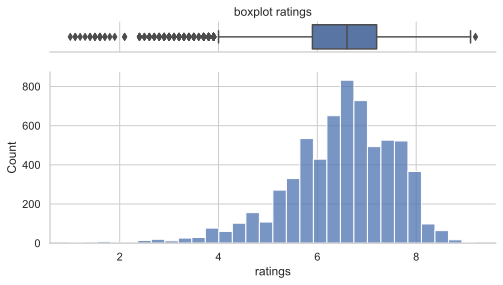

In [58]:
#Строим гистограмму и бокплот по всей выборке 
x = df['ratings']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                   gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x, ax=ax_box, orient='h').set_title('boxplot ratings')
sns.histplot(x, ax=ax_hist, bins=30)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [59]:
#Создадим отдельный датафрейм с данными по фильмам, получившим финансирование от государства: 
mc_df = df[df['refundable_support'].isna()==False]

mc_df['ratings'].describe()

count   314.00
mean      6.00
std       1.12
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       8.50
Name: ratings, dtype: float64

In [60]:
#посчитаем квантили для общей выборки
df['ratings'].quantile([0.005, 0.995])

0.01   2.60
0.99   8.60
Name: ratings, dtype: float64

In [61]:
#посчитаем квантили для маленькой выборки
mc_df['ratings'].quantile([0.005, 0.995])

0.01   2.67
0.99   8.33
Name: ratings, dtype: float64

**Вывод**

Если рассматривать квантили, которые, отделяют по 0.5% данных с двух сторон, то условные метки выбросов примерно одинаковы, это говорит о том, что, если заполнять просто медианой, то разницы практически никакой не будет. Но, по прежнему, остается вариант заполнить данные медианой с группировкой. Так или иначе, пропуски пока оставляем как есть. Если потребуется, то заполнять пропуски будем уже после того, как отбросим аномалии.

##### Изучаем `genres`

In [62]:
df['genres'].value_counts()

genres
драма                           476
комедия                         352
мелодрама,комедия               222
драма,мелодрама,комедия         189
драма,мелодрама                 183
                               ... 
мюзикл,фэнтези,семейный           1
мюзикл,мелодрама,фэнтези          1
документальный,новости,драма      1
семейный,детектив,детский         1
мелодрама,история,драма           1
Name: count, Length: 742, dtype: int64

In [63]:
#Посмотрим на строки с пропусками: 
df[df['genres'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569.00"
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#Так как жанры заказчика тоже интересуют, то смотрим по данным с финансированием от государства: 
mc_df['genres'].value_counts()

genres
драма                           47
комедия                         32
комедия,мелодрама               16
драма,мелодрама                  7
мелодрама                        6
                                ..
мюзикл,фэнтези,семейный          1
комедия,семейный,приключения     1
семейный,детектив,детский        1
мюзикл,комедия,мелодрама         1
комедия,фантастика,мелодрама     1
Name: count, Length: 145, dtype: int64

In [65]:
#узнаем, сколько пропусков в жанра в mc_df
len(mc_df[mc_df['genres'].isna()])

16

Восстановить эти данные не представляется возможным, понять откуда пропуски, автоматизация или человеческий фактор я не могу. В жанрах оставляем все как есть.  

##### Изучаем `box_office`

Согласно ТЗ, данный показатель был получен из таблицы `mkrf_shows`, которая содержит сведения о показах фильмов в российских кинотеатрах. Показатель `box_office` тоже важен для исследования и пропуски тоже несут информацию, поэтому заполнять его мы не будем. Ознакомимся с данными и, заодно, посмотрим как обстоят дела по `box_office` в `mc_df`. 

In [66]:
df['box_office'].value_counts()

box_office
0.00             24
200.00           13
300.00           12
360.00            9
500.00            8
                 ..
60,531,051.94     1
2,060,823.00      1
1,544,985.50      1
322,284.00        1
219,569.00        1
Name: count, Length: 2938, dtype: int64

In [67]:
#Посмотрим, на строки с пропуском 
df[df['box_office'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#Посмотрим, есть ли пропуски в box_office в mc_df:
mc_df[mc_df['box_office'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2800,Золотая рыбка (2015),111018715,2015-10-29 12:00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.00,"25,000,000.00","41,998,984.00",Министерство культуры,6.30,драма,NaN
3337,Любовь и Сакс,111001217,2017-02-16 12:00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.00,"10,000,000.00","61,000,000.00",Министерство культуры,5.20,мелодрама,NaN
3711,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.00,"11,520,000.00","18,706,080.00",Министерство культуры,7.00,"мультфильм,приключения,детектив",NaN
5661,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.00,"25,000,000.00","44,600,000.00",Министерство культуры,7.20,"детский,комедия",NaN
6476,Зима,111023518,2019-03-15 12:00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","39,700,000.00",Министерство культуры,5.20,"драма,криминал",NaN
6709,Мальчик русский,111002619,2019-02-20 12:00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,NaN,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,941,140.00",Министерство культуры,6.10,"драма,военный,история",NaN
6968,Танец с саблями,111008619,2019-05-29 12:00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0.00,"40,000,000.00","61,571,449.00",Министерство культуры,5.80,"драма,история,биография",NaN
7009,Куратор,111010019,2019-06-13 12:00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс",Россия - Грузия,П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0.00,"25,000,000.00","60,668,576.00",Министерство культуры,4.90,"драма,криминал,детектив",NaN
7180,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.00,"3,000,000.00","33,000,000.00",Министерство культуры,8.00,семейный,NaN
7229,На Луне,111015519,2019-11-01 12:00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","57,876,000.00",Министерство культуры,6.60,"приключения,триллер",NaN


In [69]:
print('Количество пропусков в box_office среди фильмов, интересующих заказчика: {}'.format(
    len(mc_df[mc_df['box_office'].isna()])))
print('Количество пропусков в box_office среди фильмов, интересующих заказчика: {:.2}%'.format(
    len(mc_df[mc_df['box_office'].isna()])/len(mc_df)*100))

Количество пропусков в box_office среди фильмов, интересующих заказчика: 14
Количество пропусков в box_office среди фильмов, интересующих заказчика: 4.2%


В столбце `box_office` есть пропуски у фильмов, которые интересуют заказчика, пока оставляем все как есть.

##### Вывод

На данном этапе были изучены пропуски в данных, никаких изменений и заполнений пропусков произведено не было. В части данных воспроизвести пропуски не является возможным, в другой части воспроизвести данные можно, но, чтобы наше вмешательство не повлияло на итоге исследования все изменения будем производить по мере необходимости, избавляясь от выбросов.
Переходим к изучению дубликатов. 

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [71]:
#Посмотрим, есть ли явные дубликаты: 
df.duplicated().sum()

0

##### Изучаем `title`

In [ ]:
#Попробуем выявить не явные дубликаты: 
list(df['title'])

У некоторых фильмов в конце названия присутствует правый слэш, а также некоторые фильмы повторяются, уберем ненужный знак в конце строки и посчитаем, дубли названий фильмов. Обнаруженные символы в конце строк наталкивают на мысль, что за этими символами прячутся дубликаты, поэтому посмотрим на другие столбцы с типом данных `object`, чтобы найти не нужные символы. 

In [73]:
#Обнаружили правый слэш в конце названий фильмов, отбросим его:
df['title'] = df['title'].str.rstrip('/')

In [74]:
#Некоторые названия фильмов повторяются, посчитаем сколько названий повторяется: 
df['title'].duplicated().sum()


714

##### Изучаем `type`

In [75]:
#рассмотрим type
df['type'].value_counts()

type
Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: count, dtype: int64

In [76]:
#Уберем пробелы:
df['type'] = df['type'].str.strip()

##### Изучаем `type_studio`

In [ ]:
#рассмотрим film_studio
list(df['film_studio'])

У `film_studio` вроде все в порядке, за исключением того, что зарубежные студии написаны транскриптом. Ничего не делаем.

##### Изучаем `production_country`

In [78]:
#рассмотрим production_country
df['production_country'].value_counts()

production_country
США                                                                    2172
Россия                                                                 1821
СССР                                                                    347
Франция                                                                 301
Великобритания                                                          257
                                                                       ... 
Франция-Китай                                                             1
Россия, Германия, Великобритания                                          1
Великобритания - Италия - Испания                                         1
Россия-Ирландия                                                           1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США       1
Name: count, Length: 950, dtype: int64

In [79]:
#в некоторых строках перечисление стран происходит не через запятную, а через тире, заменим на запятую:
df['production_country'] = df['production_country'].str.replace(' -',',')

##### Изучаем `director`

In [ ]:
#рассмотрим director
#list(df['director'])
list(df['director'].unique())

##### Изучаем `producer`

In [81]:
#рассмотрим producer
df['producer'].value_counts()

producer
П.Смирнов                                                                     67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                                 28
С.Сельянов                                                                    18
Д.Ловейко, О.Кузовков                                                         17
Тони Майерс                                                                   11
                                                                              ..
Б.Гуц, А.Гусенцова                                                             1
Лоран Петен, Мишель Петен                                                      1
 ООО "КиноФирма"                                                               1
Э.Илоян, В.Шляппо, А.Троцюк, Д.Жалинский, Д.Дьяченко, М.Ткаченко, А.Рубцов     1
Дженнифер Додж                                                                 1
Name: count, Length: 5349, dtype: int64

In [ ]:
list(df['producer'].unique())

In [83]:
#у некоторых строк в начале и в конце есть пробел, удалим его 
df['producer'] = df['producer'].str.strip()

##### Изучаем `age_restriction`

In [84]:
#рассмотрим age_restriction
df['age_restriction'].value_counts()

age_restriction
«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: count, dtype: int64

##### Изучаем `genres`

In [ ]:
# рассмотрим genres
list(df['genres'].unique())

In [86]:
#Жанры перечисляются через запятую без пробела, исправим: 
df['genres'] = df['genres'].str.replace(',',', ')

##### Изучаем `financung_source`

In [87]:
#Financung source
df['financing_source'].value_counts()

financing_source
Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: count, dtype: int64

In [88]:
#Проверим, появились ли явные дубликаты: 
df.duplicated().sum()

0

##### Ищем не явные дубликаты

После маленькой обработки данных новых дубликатов так и не появилось, но ранее мы заметили, что названия некоторых фильмов повторяются, посмотрим, как это выглядит в данных на примере фильма `Американский пирог: Все в сборе`

In [89]:
df.loc[df['title'] == 'Американский пирог: Все в сборе']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
630,Американский пирог: Все в сборе,121005012,2012-02-27 12:00:00,Художественный,Юниверсал Пикчерз,США,"Джон Харвитц, Хейден Шлоссберг","Крис Мур, Крэйг Перри",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,комедия,"8,000.00"
631,Американский пирог: Все в сборе,221053312,2012-07-17 12:00:00,Художественный,Юниверсал Пикчерз,США,"Джон Харвитц, Хейден Шлоссберг","Крис Мур, Крэйг Перри",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,комедия,NaN
632,Американский пирог: Все в сборе,221055312,2012-07-16 12:00:00,Художественный,Юниверсал Пикчерз,США,"Джон Харвитц, Хейден Шлоссберг","Крис Мур, Крэйг Перри",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,комедия,NaN


Когда мы выводили названия фильмов списком, можно было заметить, что повторяющиеся фильмы идут один за другим, не могу утверждать, что данная характеристика подходит для всех повторяющихся фильмов, но попробуем посмотреть на все повторяющиеся фильмы.

In [90]:
df[df.groupby(['title']).title.transform(len)>1].sort_values(by='title').head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...","США, Великобритания",Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер, биография, драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...","США, Великобритания",Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер, биография, драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик, триллер, драма",NaN
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик, триллер, драма","18,439,240.55"
1494,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик, криминал",750.00
1493,13-й район: Кирпичные особняки,221033314,2014-08-20 12:00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик, криминал",NaN
4107,13.,221123710,2010-10-25 12:00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер, драма, криминал",NaN
4307,13.,121018110,2010-09-30 12:00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер, драма, криминал",NaN


In [91]:
len(df[df.groupby(['title']).title.transform(len)>1])

1272

In [92]:
df['title'].duplicated(keep=False).sum()

1272

In [93]:
df['title'].duplicated().sum()

714

##### Вывод

Интересно, что до этого я считал дубликаты вот так `df['title'].duplicated().sum()` и счетчик написал `714`, а метод, которым я вывел все дубликаты, показал длину в `1272` строки, я сначала подумал, что где-то накосячил, а потом нашел ответ. Метод `.duplicated()` по умолчанию первому вхождению присваивает значение `True`, а всем последующим `False`. Теперь мы можем сделать вывод, что (`1272-714=558`) **558** строк имеют **714** дубликатов.

Теперь мы можем заметить, что есть строки, отличающиеся только по трём столбам, все остальное идентичны. Строки расходятся по номеру прокатного удостоверения, дате премьеры фильма и по сборам в рублях. С одной стороны, номер прокатного удостоверения уже не несет в себе ценности для дальнейшего исследования, дата премьеры фильма имеет ценность, так как заказчику интересно проследить динамику проката по годам. Причем, по некоторым фильмам год премьеры совпадает, а по некоторым нет. Сборы тоже имеют значение. Пока с данными ничего не делаем, возможно дубликаты могут появиться, если мы добавим столбец с годом даты премьеры, а после удалим столбцы `puNumber` и `show_start_date`, но мне кажется, что так делать не совсем правильно, потому что, каждый номер прокатного удостоверения это уникальный случай, когда фильм показывали в кинотеатрах и такую информацию намеренно удалять не правильно. 

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Чистку данных произвел в **пункте 2.3**, пока пытался найти дубликаты. 

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Количественные данные по датафрейму это: 
* `refundable_support`
* `nonrefundable_support`
* `budget`
* `box_office`
* `ratings`

У `refundable_support`, `nonrefundable_support` и `budget` есть важная особенность. Первые два столбца означают объем возвратных и невозвратных средств от государства. Как в первом, так и во втором могут быть значения с нулями и это не является выбросом. Столбец с бюджетом означает общий бюджет фильма, то есть, если фильм получил поддержку от государства в виде финансирования, то бюджет должен охватывать эти деньги. 
Начнем изучение по порядку:

##### Изучаем `refundable_support` и `nonrefundable_support`

In [94]:
df['refundable_support'].value_counts()

refundable_support
0.00              221
20,000,000.00      12
10,000,000.00      10
25,000,000.00      10
5,000,000.00        9
15,000,000.00       9
40,000,000.00       8
50,000,000.00       8
30,000,000.00       7
60,000,000.00       6
100,000,000.00      5
55,000,000.00       2
75,000,000.00       2
110,000,000.00      2
19,000,000.00       2
3,500,000.00        1
26,000,000.00       1
28,000,000.00       1
180,000,000.00      1
35,000,000.00       1
115,000,000.00      1
8,000,000.00        1
7,346,881.00        1
7,000,000.00        1
7,153,119.00        1
36,000,000.00       1
38,000,000.00       1
150,000,000.00      1
44,000,000.00       1
17,000,000.00       1
29,000,000.00       1
9,000,000.00        1
41,000,000.00       1
80,000,000.00       1
Name: count, dtype: int64

In [95]:
#Построим гистограмму:
def hist(column, bins, range_a, range_b, name):
    sns.histplot(data=df[column], bins=bins, binrange=(range_a, range_b)).set_title(name)

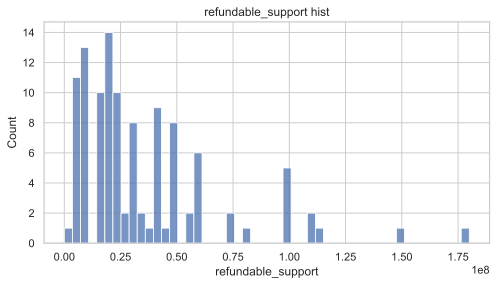

In [96]:
hist('refundable_support', 50, 1, df['refundable_support'].max(), 'refundable_support hist')

In [97]:
df['refundable_support'].describe()
#Видно, как сильно нули  искажают данные 

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

In [98]:
#Посмотрим на не возвратные деньги
df['nonrefundable_support'].value_counts().sort_values()

nonrefundable_support
41,500,000.00      1
107,847,945.00     1
24,986,000.00      1
25,345,000.00      1
20,145,285.00      1
                  ..
20,000,000.00     19
40,000,000.00     26
35,000,000.00     29
30,000,000.00     48
25,000,000.00     53
Name: count, Length: 75, dtype: int64

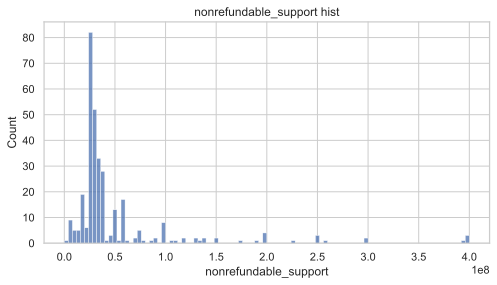

In [99]:
hist('nonrefundable_support', 100, 1, df['nonrefundable_support'].max(), 'nonrefundable_support hist')

In [100]:
df['nonrefundable_support'].describe()

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

In [101]:
#гистограммы строили исключая значения нуля, посмотрим, сколько нулей там и там: 
print('В возвратных средствах нулей {}'.format(len(df[df['refundable_support'] == 0])))
print('В НЕ возвратных средствах нулей {}'.format(len(df[df['nonrefundable_support'] == 0])))

В возвратных средствах нулей 221
В НЕ возвратных средствах нулей 9


У возвратных средств все выглядит нормальным, чаще всего государство выделяет сумму в 20 млн под возврат. У невозвратных самая популярная сумма к выдаче чуть больше, чем у возвратных, но интересен тот факт, что государство невозратные средства раздает куда охотнее, чем возвратные. У меня в голове почему-то была информация о том, что закон о возвратных деньгах был принят недавно, но я его не нашел. Плюс я посмотрел, как распределяется выдача возвратных по годам в датафрейме и не нашел никакой условной границы, откуда пошла выдача. Но, я нашел интересный закон, который говорит о том, что финансирование не может превышать 70% сметной стоимости производства фильма. (http://www.consultant.ru/document/cons_doc_LAW_11454/924cddb5e2cb64c068356e242153dc0debdee075/) В 22 году появились исключения, где финансирование может быть 100%, но это не касается текущего датафрейма. Можно ли говорить, что бюджет - это сметная стоимость производства фильма - не знаю, возможно, заполняя пропуски в бюджете по фильмам получившим гос. поддержку мы сможем увидеть какую то закономерность. 

В целом, какими бы графики ни были, они не указывают на выбросы, я предположу, что этим данных можно доверять, их мало и выделять аномалии тут не стоит. 


##### Изучаем `budget`

In [102]:
#buget
df['budget'].value_counts()
#а вот и нули

budget
0.00              17
38,000,000.00      6
50,000,000.00      4
80,000,000.00      4
37,142,857.00      3
                  ..
109,020,947.00     1
90,276,774.00      1
78,686,500.00      1
14,462,464.00      1
150,147,502.00     1
Name: count, Length: 290, dtype: int64

In [103]:
#посчтитаем, отношение денег пришедших от государства к бюджету фильма,
#для этого создадим новый столбец
df['support_to_budget'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

In [104]:
df['support_to_budget'].value_counts()

support_to_budget
inf     17
0.65     6
0.50     5
0.66     5
0.67     5
        ..
0.22     1
0.23     1
0.44     1
0.51     1
0.67     1
Name: count, Length: 282, dtype: int64

In [105]:
# поделили на ноль, получили бесконечность, заменим ее на nan
df.loc[df['support_to_budget'] == np.inf, 'support_to_budget'] = np.nan

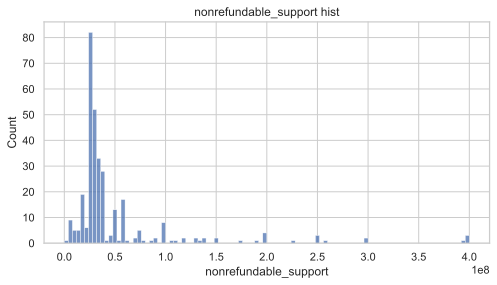

In [106]:
hist('nonrefundable_support', 100, 1, df['nonrefundable_support'].max(), 'nonrefundable_support hist')

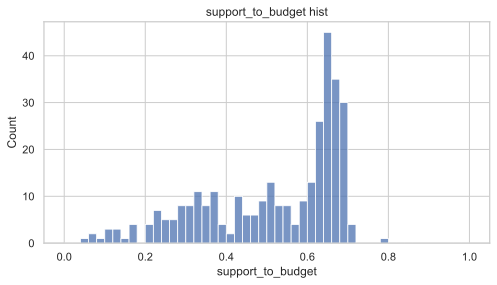

In [107]:
hist('support_to_budget', 50, 0, 1, 'support_to_budget hist')

In [108]:
#Посчитаем медиану
support_to_budget_median = df['support_to_budget'].median()
support_to_budget_median

0.5922645480995804

In [109]:
df[df['support_to_budget'] > 0.70]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_to_budget
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,NaN,"28,140.00",0.70
2379,Экспириенс,111000315,2015-01-13 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,Е.Татаров,А.Тютрюмов,«16+» - для детей старше 16 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,4.70,драма,"36,550.00",0.70
2538,Наследники (2015),111018515,2015-10-22 12:00:00,Художественный,"Культурный фонд ""Кино-телекомпания ""Православн...",Россия,В.Хотиненко,"С.Кравец, В.Хотиненко",«16+» - для детей старше 16 лет,"7,153,119.00","28,000,000.00","50,218,741.00","Министерство культуры, Фонд кино",6.10,"мюзикл, фэнтези, комедия","194,780.00",0.70
2899,Преображение (2015),111007016,2016-04-08 12:00:00,Художественный,"ООО ""АБС""",Россия,"Т.Воронецкая, Д.Сергин",Е.Белова,«16+» - для детей старше 16 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,5.70,ужасы,"56,800.00",0.70
3385,О любви (2017),111018816,2016-12-28 12:00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,"20,000,000.00","35,000,000.00","70,086,439.00","Министерство культуры, Фонд кино",NaN,NaN,"11,332,412.00",0.78


Мне кажется, что гипотеза с законом оказалась правдой, медиана равна 0.59, то есть, по медиане можно сказать, что в среднем, деньги, полученные от государства относятся к собственным вложениям компаний как 59% к 41%. Значит, чтобы заполнить пропуски по бюджету, нужно сумму бюджетных средств разделить на коэффициент. Кстати, видно, что у части фильмов отношение инвестиций со стороны государства прям граничит на этих 70%, а также, есть один фильм, где деньги государства занимать 78% от общего бюджета. Это можно было бы посчитать выбросом, но также можно и объяснить, что возможно смета фильма сократилась и из-за этого отношение государственных денег к деньгам компании увеличилось. 
Заполним пропуски в бюджете: 

In [110]:
df['budget'].describe()

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

In [111]:
df.loc[df['support_to_budget'].isna()==True, 'budget'] = (df['refundable_support']+
                                                                df['nonrefundable_support'])*support_to_budget_median

In [112]:
df['budget'].describe()

count             332.00
mean      129,712,891.88
std       187,396,218.20
min         3,553,587.29
25%        44,904,956.75
50%        70,043,219.50
75%       147,916,242.76
max     2,305,074,303.00
Name: budget, dtype: float64

In [113]:
df[df['budget'] == df['budget'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_to_budget
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения, фэнтези","333,597,059.59",0.12


За счет заполнения пропусков медиана и среднее бюджета незначительно, но выросло. Пропусков теперь тут нет. Переходим к изучению `box_office`. Мы восстановили потерянные данные в бюджете, но когда мы создали столбец с отношением государственной поддержки к общему бюджету, а именно `support_to_budget` у нас появились пропуски в тех строчках, где бюджет был нулевой. Теперь заполним столбец `support_to_budget` до конца.

In [114]:
#посмотрим на эти строки
df[(df['support_to_budget'].isna() == True) & (df['budget'].isna() == False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_to_budget
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","13,622,084.61","Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",NaN
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","44,419,841.11",Фонд кино,6.60,драма,"446,163,511.00",NaN
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","47,381,163.85",Фонд кино,7.80,"боевик, драма, криминал","196,572,438.40",NaN
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"11,845,290.96",Фонд кино,6.20,"комедия, фэнтези","67,418,974.80",NaN
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","94,762,327.70",Фонд кино,4.60,"мультфильм, приключения, фэнтези","184,487,551.40",NaN
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","34,943,608.34",Фонд кино,6.30,"комедия, драма","1,957,738.51",NaN
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","20,729,259.18",Фонд кино,5.10,"комедия, мелодрама","72,937,783.20",NaN
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","3,553,587.29",Министерство культуры,4.30,комедия,"15,362,931.43",NaN
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","41,458,518.37",Фонд кино,6.30,"комедия, мелодрама","70,299,052.00",NaN
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","148,066,137.02",Фонд кино,5.60,фантастика,"1,038,321,489.00",NaN


In [115]:
df.loc[(df['support_to_budget'].isna() == True) & (df['budget'].isna() == False), 'support_to_budget'] = (
    df['refundable_support'] + df['nonrefundable_support']) / df['budget']

In [116]:
#их нет
df[(df['support_to_budget'].isna() == True) & (df['budget'].isna() == False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_to_budget


##### Изучение `box_office`

In [117]:
df['box_office'].value_counts()

box_office
0.00             24
200.00           13
300.00           12
360.00            9
500.00            8
                 ..
60,531,051.94     1
2,060,823.00      1
1,544,985.50      1
322,284.00        1
219,569.00        1
Name: count, Length: 2938, dtype: int64

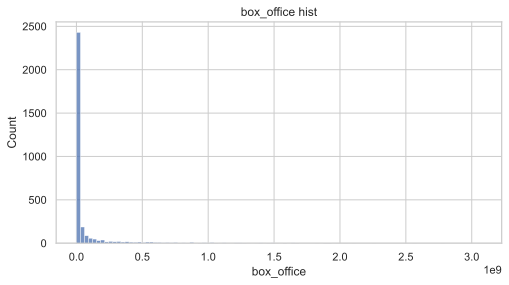

In [118]:
#Видно, что очень много данных с сильно маленькими показателями, построим гистограмму:
hist(column='box_office', bins=100, range_a=df['box_office'].min(), range_b=df['box_office'].max(), name='box_office hist' )

In [119]:
#Видно, что очень очень много данных с маленьких значением, посмотрим .describe()
df['box_office'].describe()

count           3,158.00
mean       76,478,696.16
std       240,353,122.82
min                 0.00
25%            86,239.00
50%         2,327,987.55
75%        23,979,671.02
max     3,073,568,690.79
Name: box_office, dtype: float64

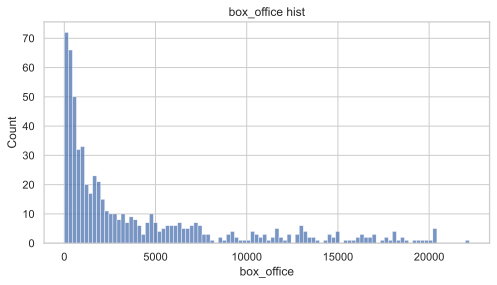

In [120]:
#Посмтроим гистограмму, указав предел 25 квантиль: 
hist(column='box_office', bins=100, range_a=df['box_office'].min(), range_b=df['box_office'].quantile(0.2),
     name='box_office hist')

In [121]:
df['box_office'].quantile(0.1)

1800.0

In [122]:
df[df['box_office'] < 1800]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_to_budget
18,Неподдающиеся,111003616,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.00,"мелодрама, комедия",360.00,NaN
19,Неподсуден,111003716,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,420.00,NaN
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.70,"комедия, мелодрама, криминал",380.00,NaN
38,Мужики!..,111007213,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.10,драма,"1,165.00",NaN
52,Айболит - 66,111010513,2013-12-19 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ролан Быков,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.10,"мюзикл, комедия, детский","1,795.00",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,Монстр в Париже 3D,124002411,2011-12-12 12:00:00,Анимационный,"Еуропа Корпорейшн, Франс 3 Синема, Бибо Фильм,...",Франция,Бибо Бержерон,"Люк Бессон, Оливье Бизе, Реми Бура, Андре Клевел",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.40,"мультфильм, фэнтези, мелодрама","1,040.00",NaN
5282,Война богов: Бессмертные 3D,121020411,2011-10-25 12:00:00,Художественный,"Релативити Медиа, Этмосфиэ Интертейнмент ЭмЭм,...",США,Тарсем Синх,"Марк Кэнтон, Райан Кавано, Джанни Нуннари",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.80,"фэнтези, боевик, драма","1,710.00",NaN
5297,Бой с тенью-3: последний раунд,111007211,2011-10-18 12:00:00,Художественный,"ООО ""Шаман пикчерс""",Россия,А.Сидоров,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"боевик, драма, криминал",500.00,NaN
5343,Хранитель времени 3D,121023411,2011-12-15 12:00:00,Художественный,"ДжиКей Филмз, Инфинитум Найхл",США,Мартин Скорсезе,"Джонни Депп, Тим Хэдингтон, Грэм Кинг, Мартин ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.90,"драма, детектив, приключения",750.00,NaN


Данные распределяются очень странно, маленьких значений очень много, я сначала подумал, что, возможно, в какой то момент времени данные записывались не в рублях, а в миллионах и что тут такая смесь, пошел смотреть на сайт Министерства Культуры, убедился, что данные в учебном датасете собирались из двух таблиц, из **Реестра прокатных удостоверений** и из **Сведений о показах фильмов в кинозалах**, во второй таблице можно увидеть сборы, в таблице информация сейчас доступна до 2014 года, там и в правду присутствуют фильмы, у которых очень маленькие сборы, причем такие данные есть по известным фильмам. Я принимаю решение ничего с этими данными не делать.

In [123]:
qwert = df.pivot_table(index='production_country', values='box_office', aggfunc='median')
qwert.sort_values(by='box_office', ascending=True).head(15)

,box_office
production_country,
Канада-Великобритания,0.00
"Германия, Нидерланды, Беларусь, Россия, Латвия",0.00
"СССР, Франция, Англия, Куба, ГДР",0.00
"Германия, Бельгия, США,Франция",0.00
Франция-Австралия,0.00
Франция-Италия-Испания-Венгрия,80.00
"СССР, Финляндия",100.00
"Канада, Франция, Великобритания",150.00
Франция-Аргентина,150.00


##### Изучение `ratings`

In [124]:
df['ratings'].value_counts()

ratings
6.60    312
6.70    308
6.80    261
7.20    252
6.20    243
       ... 
1.80      1
1.20      1
9.20      1
8.90      1
9.10      1
Name: count, Length: 80, dtype: int64

Ранее мы выяснили, что значение выбросов по рейтингу для всей выборки и для выборки фильмов, получивших финансирование от государства примерно одинаковые, поэтому, при анализе рейтинга, будет использовать границы, установленные вот этими квантилями:  

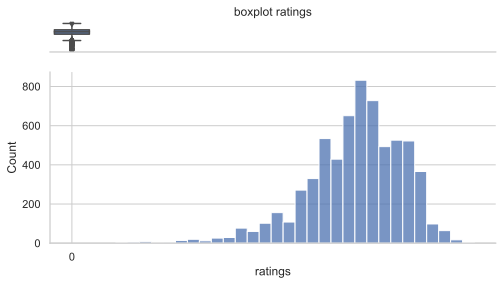

In [125]:
x = df['ratings']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                   gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x, ax=ax_box).set_title('boxplot ratings')
sns.histplot(x, ax=ax_hist, bins=30)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [126]:
df['ratings'].quantile([0.01, 0.99])

0.01   3.10
0.99   8.50
Name: ratings, dtype: float64

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [127]:
#Добавляем столбец с годом проката
df['year'] = df['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [128]:
#df['main_genre'] = df['genres'].str.split(',').str[0]
#df['main_director'] = df['director'].str.split(',').str[0]

In [129]:
def main(main_name, where, how):
    df[main_name] = df[where].str.split(how).str[0]

In [130]:
main(main_name='main_director', where='director', how=',')
main(main_name='main_genre', where='genres', how=',')


In [131]:
#df['director'] = df['director'].fillna('')
#df['genres'] = df['genres'].fillna('')
#def main1(row):
#    return row.split(',')[0]

In [132]:
#df['main_director'] = df['director'].apply(main1)
#df['main_genre'] = df['genres'].apply(main1)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка. - **Уже сделано в 2.5**

In [133]:
df[df['support_to_budget'].isna() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_to_budget,year,main_director,main_genre
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма, мелодрама","365,353.60",0.33,2013,А.Атанесян,драма
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,NaN,"28,140.00",0.70,2014,А.Якимчук,NaN
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия, фантастика","19,957,031.50",0.61,2013,Р.Давлетьяров,комедия
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",0.69,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",0.62,2014,М.Угаров,драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история, биография, драма","717,703,185.53",0.51,2019,А.Кравчук,история
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм, приключения, семейный","501,069,235.00",0.53,2019,Д.Шмидт,мультфильм
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика, боевик",NaN,0.53,2019,Ф.Бондарчук,фантастика
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN,0.65,2019,И.Северов,драма


#### Вывод по предобработке




На данный момент мы изучили данные и сделали их предобработку перед дальнейшим исследованием. Вспомним, что мы сделали: 
* Выяснили, что в данных есть один фильм, у которого нет прокатного удостоверения
* Предположили, что в колонке, отвечающей за продюсера - пропуски не случайные, у многих старых фильмов не было продюсера. Например, в Советском Союзе роль продюсера выполнял директор фильма.
* Исправили данные в рейтинге
* Убрали пробелы и лишние знаки в категориальных значениях 
* Определили ценность столбца `puNumber`
* Определили как именно столбцы `refundable_support` , `nonrefundable_support` и `budget` связаны. Нашли зависимость спонсорских денег от государства и всего бюджета, основанную на Федеральном законе от 22.08.1996 N 126-ФЗ. А также узнали, что государство охотнее делится невозвратными деньгами, нежели возвратными. Плюс заполнили пропуски в `budget`, касаемо фильмов, получивших поддержку. 
* Изучили столбец `box_office`, отвечающий за сборы с показов и выяснили, что такие данные вполне реальны и их можно объяснить тем, что в датафрейме есть не коммерческие показы, есть показы старых фильмов. 
* Добавили новые столбцы `support_to_budget`, `year`, `main_director`, `main_genre`. 


### Шаг 3. Проведите исследовательский анализ данных


#### Динамика выхода фильмов  в прокат по годам
- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [134]:
#сгрупируем и посчитаем сколько фильмов выходило в прокат по годам, учитываем только те фильмы, по которым есть информация
#в box_office
movie_count_by_year = df.query('box_office.isna()==False').pivot_table(index='year', values='box_office', aggfunc='count')
movie_count_by_year.columns = ['box_office_count']
movie_count_by_year

,box_office_count
year,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,475


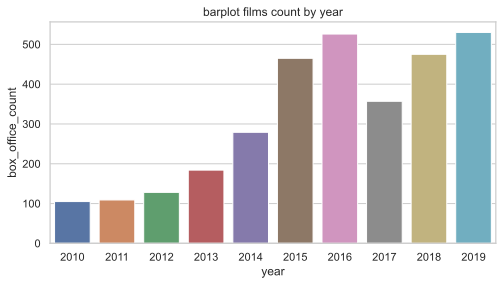

In [135]:
#построим барплот по сгруппированным данным
sns.barplot(x=movie_count_by_year.index, y='box_office_count', data=movie_count_by_year).set_title('barplot films count by year');

In [136]:
#Посчитаем долю фильмов с указанной информацией о прокате
print('Процент фильмов с указанной информацией о прокате равен {:.2f}%'.format(len(df[df['box_office'].isna() == False]) /
                                                                                len(df['box_office'])*100))

Процент фильмов с указанной информацией о прокате равен 42.19%


In [137]:
movie_count_by_year = df.query('box_office.isna()==False').pivot_table(index='year', values='box_office', aggfunc='count')
movie_count_by_year.columns = ['box_office_count']
movie_count_by_year

,box_office_count
year,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,475


В данных сведения о сборах есть только у 42.19%, по графику видно, что с 2010 по 2016 год количество фильмов в прокате росло, в 2017 случился спад и показатели вернулись к пику в 2019, в 2016 и 2019 года наблюдается больше всего прокатов фильмов, 526 и 530 соответственно. 

#### Динамика кассовых сборов фильмов по годам
- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [138]:
movie_box_by_year = df.query('box_office.isna()==False').pivot_table(index='year', values='box_office', aggfunc=['min', 'max'])
movie_box_by_year.columns =['min', 'max']
movie_box_by_year

,min,max
year,,
2010,0.00,"1,446,400.00"
2011,125.00,"11,618,085.00"
2012,0.00,"2,311,220.00"
2013,0.00,"19,957,031.50"
2014,0.00,"1,016,410,635.30"
2015,0.00,"1,658,861,425.50"
2016,0.00,"2,048,126,108.00"
2017,"7,900.00","2,779,686,144.00"
2018,"41,225.00","2,271,754,004.52"


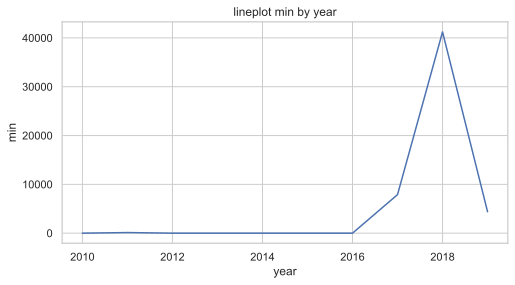

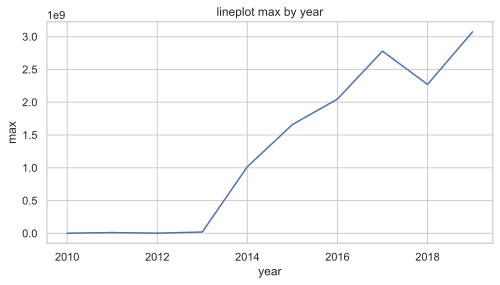

In [139]:
#Построим
sns.lineplot(x=movie_box_by_year.index, y='min', data=movie_box_by_year).set_title('lineplot min by year');
plt.show()
sns.lineplot(x=movie_box_by_year.index, y='max', data=movie_box_by_year).set_title('lineplot max by year');

С 2010 по 2016 год в данных присутствуют фильмы, почти или совсем ничего не собравшие, к 2017 году ситуация немного меняется, но все равно минимальные значения крайне маленькие, что говорит о том, что в прокате были крайне неудачные коммерческие показы. Ситуация с максимальными значениями лучше, видно, что  с 2010 по 2013 года максимальные сборы уже весомые, но по отношению к последующим годам маленькие, в 2014 году произошел резкий скачок, рост сохранялся до 2017 года, в 2018 году был небольшой спад. 



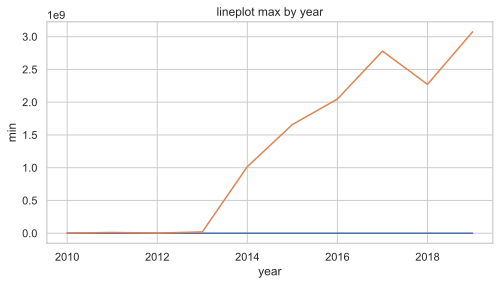

In [140]:
#Построим
sns.lineplot(x=movie_box_by_year.index, y='min', data=movie_box_by_year).set_title('lineplot min by year');
sns.lineplot(x=movie_box_by_year.index, y='max', data=movie_box_by_year).set_title('lineplot max by year');

#### Средняя и медиана сборов фильмов по годам
- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [141]:
movie_box_mean_median_by_year = df.query('box_office.isna()==False').pivot_table(index='year',
    values='box_office', aggfunc=['mean', 'median'])
movie_box_mean_median_by_year.columns =['mean', 'median']
movie_box_mean_median_by_year

,mean,median
year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


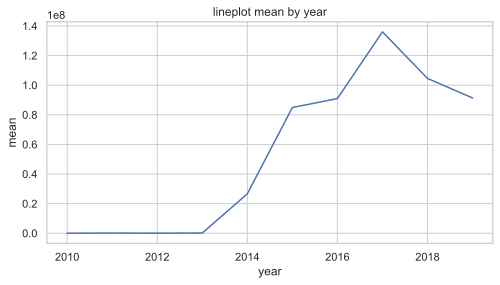

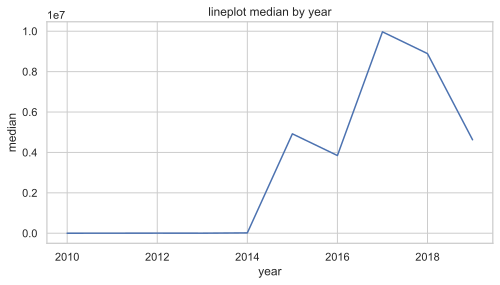

In [142]:
#Построим
sns.lineplot(x=movie_box_mean_median_by_year.index, y='mean', data=movie_box_mean_median_by_year).set_title(
    'lineplot mean by year');
plt.show()
sns.lineplot(x=movie_box_mean_median_by_year.index, y='median', data=movie_box_mean_median_by_year).set_title(
    'lineplot median by year');

Медиана всегда сильно ниже, чем среднее, обусловлено тем, что в данных присутствуют фильмы с очень большой кассой. 

#### Анализ влияния возрастного ограничения фильма на кассовые сборы
- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

,sum
age_restriction,
«0+» - для любой зрительской аудитории,"1,205,003,951.67"
«12+» - для детей старше 12 лет,"63,225,588,059.83"
«16+» - для детей старше 16 лет,"76,583,674,040.93"
«18+» - запрещено для детей,"42,974,727,569.62"
«6+» - для детей старше 6 лет,"57,530,728,855.08"


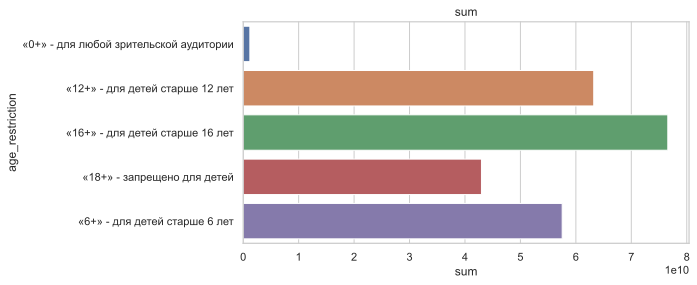

In [143]:
movie_box_and_age = df.query(
    '(box_office.isna()==False)').pivot_table(
    index=['age_restriction'],values='box_office', aggfunc=['sum'])
movie_box_and_age.columns =['sum']
display(movie_box_and_age)
sns.barplot(y=movie_box_and_age.index, x='sum', data=movie_box_and_age).set_title('sum');






По всей выборке видно, что больше всего кассу собрали фильмы с возрастным ограничением 16+, у фильмов 0+ совсем грустные показатели. Посмотрим, как меняется ситуация по годам: 





,sum
age_restriction,
«0+» - для любой зрительской аудитории,"379,054,578.37"
«12+» - для детей старше 12 лет,"13,616,082,008.91"
«16+» - для детей старше 16 лет,"11,368,120,870.27"
«18+» - запрещено для детей,"5,432,308,367.44"
«6+» - для детей старше 6 лет,"8,701,799,371.41"


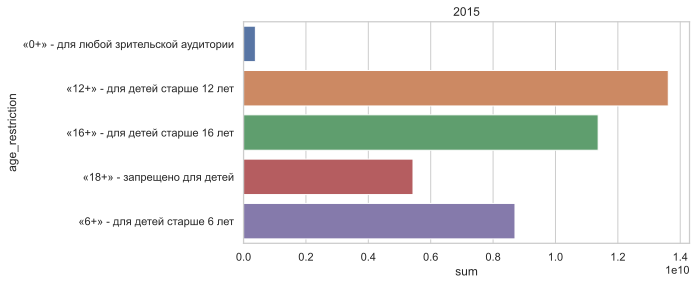

,sum
age_restriction,
«0+» - для любой зрительской аудитории,"150,228,848.67"
«12+» - для детей старше 12 лет,"12,204,446,524.39"
«16+» - для детей старше 16 лет,"16,664,548,541.74"
«18+» - запрещено для детей,"6,793,929,818.87"
«6+» - для детей старше 6 лет,"12,053,146,008.24"


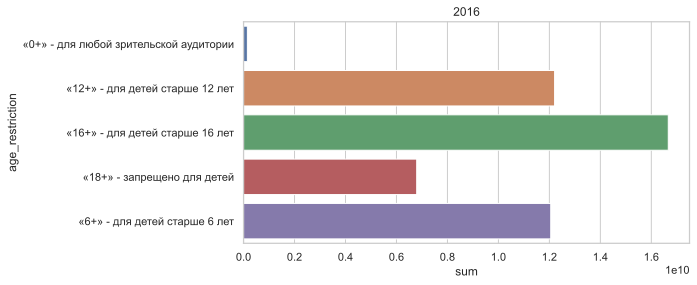

,sum
age_restriction,
«0+» - для любой зрительской аудитории,"229,598,930.00"
«12+» - для детей старше 12 лет,"7,851,427,660.67"
«16+» - для детей старше 16 лет,"18,745,042,900.06"
«18+» - запрещено для детей,"9,651,495,581.02"
«6+» - для детей старше 6 лет,"12,086,142,145.76"


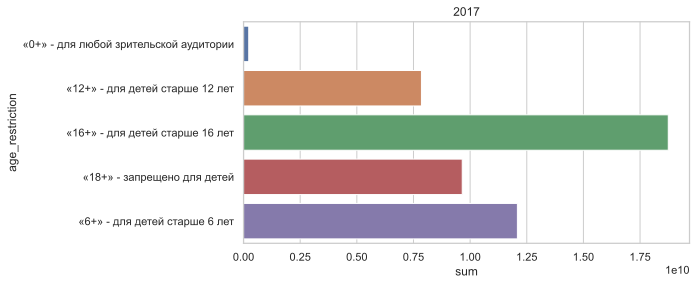

,sum
age_restriction,
«0+» - для любой зрительской аудитории,"32,449,002.11"
«12+» - для детей старше 12 лет,"14,267,291,660.69"
«16+» - для детей старше 16 лет,"16,503,602,346.96"
«18+» - запрещено для детей,"8,760,085,501.15"
«6+» - для детей старше 6 лет,"10,104,974,623.41"


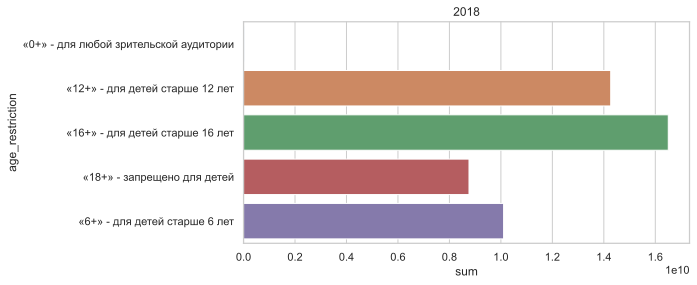

,sum
age_restriction,
«0+» - для любой зрительской аудитории,"17,746,066.82"
«12+» - для детей старше 12 лет,"12,680,198,773.67"
«16+» - для детей старше 16 лет,"12,753,418,984.60"
«18+» - запрещено для детей,"10,121,796,303.64"
«6+» - для детей старше 6 лет,"12,852,548,650.86"


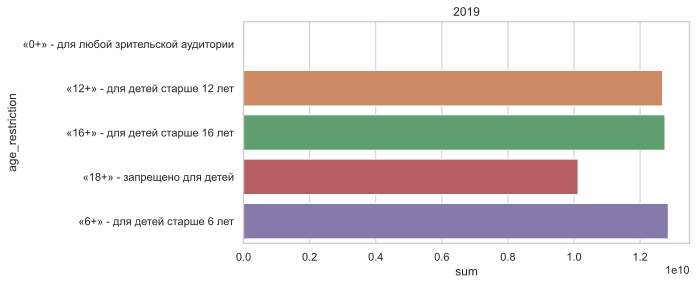

In [144]:
years = [2015, 2016, 2017, 2018, 2019]
for year in years:
    movie_box_and_age_by_year = df.query(
        '(box_office.isna()==False) and (year==@year)').pivot_table(
        index=['age_restriction'],values='box_office', aggfunc=['sum'])
    movie_box_and_age_by_year.columns =['sum']
    sns.barplot(y=movie_box_and_age_by_year.index, x='sum', data=movie_box_and_age_by_year).set_title(year)
    display(movie_box_and_age_by_year)
    plt.show()
    

Ситуация по годам менялась, в 2014 больше всего денег собрали фильмы `12+`, почти 14 миллиардов рублей, с 2016 по 2018 год первое место оставалось за фильмами `16+`, а в 2019 категории `12+`, `16+` и `6+` держались примерно на одном уровне в ~12.6 миллиардов рублей. Стоит отметить, что фильмы `0+` всегда проигрышный вариант, нужно посмотреть, в каком количестве снимали фильмы в разных возрастных категориях, фильмы `18+` собирают весомую кассу, но всегда меньше, чем `12+`, `16+`, `6+`. 

In [145]:
years = [2015,2016,2017,2018,2019]
for year in years:
    movie_box_and_age_by_year = df.query(
        '(box_office.isna()==False) and (year==@year)').pivot_table(
        index=['age_restriction'],values='box_office', aggfunc=['count','mean'])
    movie_box_and_age_by_year.columns =['count','mean']
    
    display(movie_box_and_age_by_year)
    print('Количество фильмов в возрастном ограничении и среднее за {} год'.format(year))

,count,mean
age_restriction,,
«0+» - для любой зрительской аудитории,39,"9,719,348.16"
«12+» - для детей старше 12 лет,73,"186,521,671.35"
«16+» - для детей старше 16 лет,168,"67,667,386.13"
«18+» - запрещено для детей,132,"41,153,851.27"
«6+» - для детей старше 6 лет,53,"164,184,893.80"


Количество фильмов в возрастном ограничении и среднее за 2015 год


,count,mean
age_restriction,,
«0+» - для любой зрительской аудитории,41,"3,664,118.26"
«12+» - для детей старше 12 лет,82,"148,834,713.71"
«16+» - для детей старше 16 лет,182,"91,563,453.53"
«18+» - запрещено для детей,151,"44,992,912.71"
«6+» - для детей старше 6 лет,70,"172,187,800.12"


Количество фильмов в возрастном ограничении и среднее за 2016 год


,count,mean
age_restriction,,
«0+» - для любой зрительской аудитории,3,"76,532,976.67"
«12+» - для детей старше 12 лет,41,"191,498,235.63"
«16+» - для детей старше 16 лет,121,"154,917,709.92"
«18+» - запрещено для детей,147,"65,656,432.52"
«6+» - для детей старше 6 лет,45,"268,580,936.57"


Количество фильмов в возрастном ограничении и среднее за 2017 год


,count,mean
age_restriction,,
«0+» - для любой зрительской аудитории,5,"6,489,800.42"
«12+» - для детей старше 12 лет,67,"212,944,651.65"
«16+» - для детей старше 16 лет,156,"105,792,322.74"
«18+» - запрещено для детей,179,"48,939,025.15"
«6+» - для детей старше 6 лет,68,"148,602,567.99"


Количество фильмов в возрастном ограничении и среднее за 2018 год


,count,mean
age_restriction,,
«0+» - для любой зрительской аудитории,3,"5,915,355.61"
«12+» - для детей старше 12 лет,85,"149,178,809.10"
«16+» - для детей старше 16 лет,178,"71,648,421.26"
«18+» - запрещено для детей,183,"55,310,362.31"
«6+» - для детей старше 6 лет,81,"158,673,440.13"


Количество фильмов в возрастном ограничении и среднее за 2019 год


Фильмы `0+` почти не снимают, фильмы `12+` и `6+` снимают реже фильмов `16+` и `18+`, возможно, это связанно с тем, что `12+` и `6+` зачастую это анимация, которая требует больше времени на производство, касса тоже интересно распределяется, `12+` и `6+` в среднем собирают кассу больше, чем `18+` и `16+`, то последние фильмы снимают чаще. 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Ранее, на этапе изучения данных мы создавали отдельный датафрейм для данных, интересующих заказчика, но по ходу исследования общий датафрейм получил множество изменений, поэтому обновим датафрейм и для удобства продолжим изучение в нем.

#### Анализ экономических показателей по годам

In [146]:
mc_df = df[df['refundable_support'].isna()==False]

In [147]:
mc_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_to_budget,year,main_director,main_genre
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма, мелодрама","365,353.60",0.33,2013,А.Атанесян,драма
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,NaN,"28,140.00",0.70,2014,А.Якимчук,NaN
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия, фантастика","19,957,031.50",0.61,2013,Р.Давлетьяров,комедия
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",0.69,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",0.62,2014,М.Угаров,драма


In [148]:
mc_df.describe()

,show_start_date,refundable_support,nonrefundable_support,budget,ratings,box_office,support_to_budget,year
count,332,332.00,332.00,332.00,314.00,318.00,332.00,332.00
mean,2017-03-31 23:46:59.277108480,"11,864,457.83","48,980,988.89","129,712,891.88",6.00,"132,432,420.05",0.58,"2,016.72"
min,2013-09-10 12:00:00,0.00,0.00,"3,553,587.29",1.00,"1,550.00",0.04,"2,013.00"
25%,2015-10-16 06:00:00,0.00,"25,000,000.00","44,904,956.75",5.30,"1,236,675.50",0.38,"2,015.00"
50%,2017-01-15 00:00:00,0.00,"30,000,000.00","70,043,219.50",6.20,"15,720,067.71",0.61,"2,017.00"
75%,2018-09-29 06:00:00,"15,000,000.00","40,375,000.00","147,916,242.76",6.70,"106,373,008.27",0.66,"2,018.00"
max,2019-12-26 12:00:00,"180,000,000.00","400,000,000.00","2,305,074,303.00",8.50,"3,073,568,690.79",1.69,"2,019.00"
std,NaN,"24,916,555.26","59,980,117.92","187,396,218.20",1.12,"334,837,856.99",0.31,1.64


In [149]:
#посмотрим, сколько всего государство выделило  денег и сколько эти фильмы суммарно заработали по годам:
lose_money = mc_df.pivot_table(index='year', values=['box_office','refundable_support', 'nonrefundable_support'], 
                              aggfunc='sum')
lose_money

,box_office,nonrefundable_support,refundable_support
year,,,
2013,"20,322,385.10","134,347,945.00",0.00
2014,"1,017,422,166.60","501,002,299.00","71,000,000.00"
2015,"5,785,285,418.14","3,019,088,340.00","637,153,119.00"
2016,"6,081,707,839.10","3,381,655,482.00","921,500,000.00"
2017,"10,865,075,300.96","2,464,624,781.00","719,346,881.00"
2018,"9,934,069,010.25","2,784,969,465.00","662,000,000.00"
2019,"8,409,627,454.63","3,976,000,000.00","928,000,000.00"


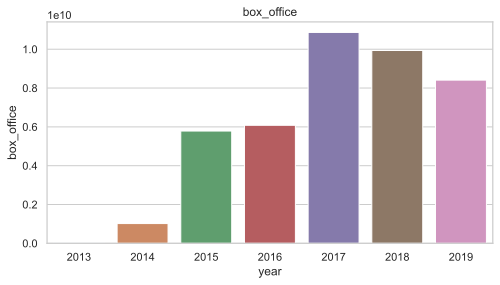

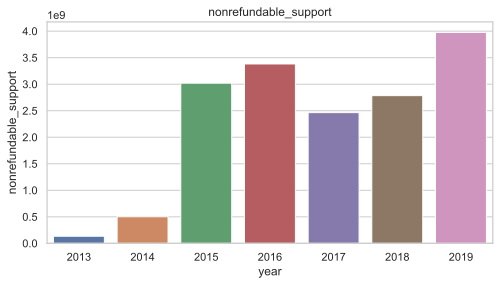

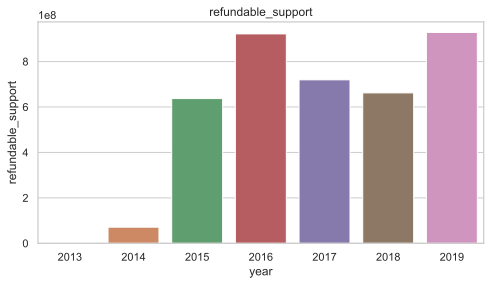

In [150]:
for column in lose_money.columns:
    sns.barplot(x=lose_money.index, y=column, data=lose_money).set_title(column);
    plt.show()


In [151]:
#посчитаем, сколько всего государство выделило возвратных денег:
print('Государство выделило возвратных денег {}'.format(mc_df['refundable_support'].sum())) 

Государство выделило возвратных денег 3939000000.0


In [152]:
#посчитаем, сколько всего государство выделило невозвратных денег:
print('Государство выделило невозвратных денег {}'.format(mc_df['nonrefundable_support'].sum()))

Государство выделило невозвратных денег 16261688312.0


In [153]:
#посчитаем, сколько фильмы получившие поддержку заработали денег 
print('Фильмы собрали кассу равную {}'.format(mc_df['box_office'].sum()))

Фильмы собрали кассу равную 42113509574.78


In [154]:
#отношение невозвратных к возвратным деньгам 
print('Невозвратные деньги выдают в {:.2f} чаще'.format(mc_df['nonrefundable_support'].sum() /
                                                        mc_df['refundable_support'].sum()))

Невозвратные деньги выдают в 4.13 чаще


In [155]:
print('За все время государство выделило денег равное {:.1f}% от всех денег, которые собрали фильмы'.format(
    (mc_df['refundable_support'].sum()+mc_df['nonrefundable_support'].sum()) / mc_df['box_office'].sum() *100))

За все время государство выделило денег равное 48.0% от всех денег, которые собрали фильмы


Графики получились не очень информативные, так как разные разряды, но представление о ситуации можно составить. Самым провальным был 2013 год, государство выделило больше денег, чем собрали кассу. В других годах ситуация не кажется такой критичной, но нужно понимать тот факт, что здесь отображена средняя температура по больнице, нас больше интересуют частные случаи, когда кинокомпании берут деньги и совсем их не отбивают. Невозвратные деньги государство выделяет в 4 раза чаще, чем возвратные. 

#### Анализ показателей по фильмам, студиям, режиссерам

Добавим новый столбец, отвечающий за отношение финансирования со стороны государства к сборам фильмов 

In [156]:
mc_df['support_to_box_office'] = (mc_df['refundable_support'] + mc_df['nonrefundable_support']) / mc_df['box_office']

In [157]:
mc_df.pivot_table(index='year', values=['support_to_box_office'], aggfunc='median')

,support_to_box_office
year,
2013,38.97
2014,7.14
2015,5.45
2016,3.09
2017,0.76
2018,1.29
2019,2.13


Вау, судя по всему, в 2017 прокатывали классные фильмы. 2013 год просто провальный, перейдем к фильмам

In [158]:
#Посмотрим фильмы, которые не отбили вложений
mc_df[mc_df['support_to_box_office'] >1]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support_to_budget,year,main_director,main_genre,support_to_box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма, мелодрама","365,353.60",0.33,2013,А.Атанесян,драма,72.53
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,NaN,NaN,"28,140.00",0.70,2014,А.Якимчук,NaN,923.95
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия, фантастика","19,957,031.50",0.61,2013,Р.Давлетьяров,комедия,5.40
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",0.69,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,500.74
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",0.62,2014,М.Угаров,драма,107.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,Волшебник,111016219,2019-10-03 12:00:00,Художественный,"ООО ""Медиа Юниверсал""",Россия,М.Морсков,"Б.Анисимов, И.Магомедов, В.Маслов",«12+» - для детей старше 12 лет,0.00,...,"40,000,000.00",Министерство культуры,7.10,"фэнтези, драма, детектив","13,848,461.92",0.62,2019,М.Морсков,фэнтези,1.81
7290,Урфин Джюс возвращается,114004019,2019-10-14 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,Ф.Дмитриев,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,0.00,...,"300,000,000.00",Фонд кино,6.20,"мультфильм, детский","68,549,523.47",0.67,2019,Ф.Дмитриев,мультфильм,2.92
7320,Новогодний ремонт,111018219,2019-11-07 12:00:00,Художественный,"ООО ""ВитЭл""",Россия,А.Пинхасов,"Е.Михайлова, В.Галыгин, В.Колесник, А.Седых, Г...",«12+» - для детей старше 12 лет,0.00,...,"30,448,911.00",Министерство культуры,5.60,"комедия, мелодрама","3,591,456.36",0.66,2019,А.Пинхасов,комедия,5.57
7322,Успех,111018519,2019-11-04 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,"5,000,000.00",...,"75,000,000.00",Фонд кино,7.80,драма,"3,181,218.00",0.33,2019,П.Руминов,драма,7.86


In [159]:
print('{:.2f}% фильмов не смогли отбить деньги, данные государством'.format(len(mc_df[mc_df['support_to_box_office'] >1])/
                                                                len(mc_df['support_to_box_office'].isna()==False)*100))

60.24% фильмов не смогли отбить деньги, данные государством


In [160]:
#выведем топ десять самых неудачных студий
mc_df[mc_df['support_to_box_office'] >1]['film_studio'].value_counts().head(10)

film_studio
ООО "Кинокомпания "СТВ"                      5
ООО "Каро Продакшн"                          4
ООО "Продюсерский центр "Ленфильм"           4
ООО "Студия "СЛОН"                           3
ООО "Киностудия "ВЕРТИКАЛЬ"                  3
ООО "Нон-Стоп Продакшн"                      3
ООО "ВВП Альянс"                             2
ООО "Русские Золотые Серии"                  2
АО "ТПО "Киностудия им.М.Горького"           2
ООО "Продюсерский Центр "Хорошо Продакшн"    2
Name: count, dtype: int64

In [161]:
#выведем топ десять самых неудачных режиссеров
mc_df[mc_df['support_to_box_office'] >1]['main_director'].value_counts().head(10)

main_director
Р.Давлетьяров     4
А.Котт            3
А.Якимчук         2
А.Федорченко      2
В.Хотиненко       2
К.Худяков         2
А.Матисон         2
В.Глаголева       2
Н.Меркулова       2
А.Карпиловский    2
Name: count, dtype: int64

In [162]:
#Самый не окупившийся фильм. 
mc_df[mc_df['support_to_box_office'] == mc_df['support_to_box_office'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support_to_budget,year,main_director,main_genre,support_to_box_office
3149,Я-Учитель,111019715,2015-12-02 12:00:00,Художественный,"НП Киностудия детских и юношеских фильмов ""Иль...",Россия,С.Мокрицкий,А.Ковтунец,«12+» - для детей старше 12 лет,0.00,...,"91,000,000.00",Министерство культуры,7.40,"мелодрама, комедия","1,550.00",0.38,2015,С.Мокрицкий,мелодрама,"22,580.65"


In [163]:
mc_df['ratings'].quantile([0.01, 0.99])

0.01   2.90
0.99   8.09
Name: ratings, dtype: float64

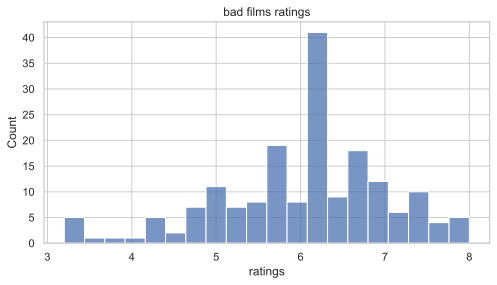

In [164]:
#попробуем посмотреть, какие оценки получают плохие фильмы
bad_films_count =mc_df[(mc_df['support_to_box_office'] >1) & (mc_df['ratings']>mc_df['ratings'].quantile(0.01)) &
                      (mc_df['ratings'] < mc_df['ratings'].quantile(0.99))]
sns.histplot(x='ratings', data=bad_films_count, bins=20).set_title('bad films ratings');

In [165]:
bad_films_count['ratings'].median()

6.2

У фильмов, которые не окупаются в среднем оценка 6.2, посмотрим, какая оценка у фильмов, которые окупаются: 

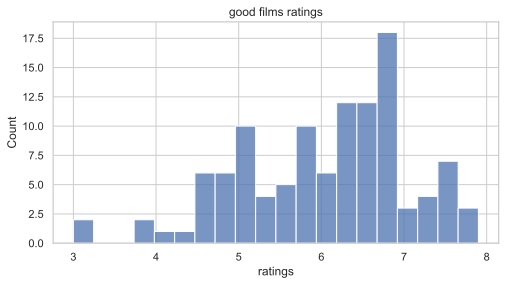

In [166]:

good_films_count =mc_df[(mc_df['support_to_box_office'] <1) & (mc_df['ratings']>mc_df['ratings'].quantile(0.01)) &
                      (mc_df['ratings'] < mc_df['ratings'].quantile(0.99))]
sns.histplot(x='ratings', data=good_films_count, bins=20).set_title('good films ratings');

In [167]:
good_films_count['ratings'].median()

6.2

Удивительно, но в среднем оценки у окупаемых и не окупаемых фильмов одинаковые, но графики указывают на то, что  не окупаемые фильмы чаще получают среднюю оценку, когда те фильмы, которые окупаются получают оценки как хуже, так и лучше медианной. 

In [168]:
#выведем топ десять самых удачных студий
mc_df[mc_df['support_to_box_office'] <1]['film_studio'].value_counts().head(10)

film_studio
ООО "Студия анимационного кино "Мельница"            6
ООО "ТаББаК"                                         4
АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"            3
ООО "Пиманов и партнеры"                             3
ООО "Водород 2011"                                   2
ООО "Ол Медиа Компани"                               2
ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"                            2
ООО "Продюсерская фирма Игоря Толстунова"            2
ООО "Студия "ТРИТЭ" Никиты Михалкова"                2
ООО "Киностудия "Слово", ООО "Арт Пикчерс Студия"    2
Name: count, dtype: int64

In [169]:
#выведем топ десять самых удачных режиссеров
mc_df[mc_df['support_to_box_office'] <1]['main_director'].value_counts().head(10)

main_director
С.Андреасян       4
Д.Дьяченко        4
Д.Шмидт           3
Т.Бекмамбетов     2
Р.Гигинеишвили    2
М.Расходников     2
А.Богуславский    2
А.Волгин          2
В.Тодоровский     2
Л.Марголин        2
Name: count, dtype: int64

In [170]:
#Самый окупившийся фильм. 
mc_df[mc_df['support_to_box_office'] == mc_df['support_to_box_office'].min()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support_to_budget,year,main_director,main_genre,support_to_box_office
7456,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00",...,"160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79",0.38,2019,К.Шипенко,комедия,0.02


In [171]:
#выведем неудачные жанры
mc_df[mc_df['support_to_box_office'] >1]['main_genre'].value_counts().head(10)

main_genre
драма         68
комедия       38
мелодрама     14
триллер       13
мультфильм    10
фэнтези        8
военный        5
ужасы          5
фантастика     4
детектив       4
Name: count, dtype: int64

In [172]:
#выведем удачные жанры
mc_df[mc_df['support_to_box_office'] <1]['main_genre'].value_counts().head(10)

main_genre
комедия        35
мультфильм     20
драма          19
фантастика      6
ужасы           5
приключения     5
семейный        4
боевик          4
военный         4
спорт           3
Name: count, dtype: int64

### Шаг 5. Напишите общий вывод

Для исследования были предоставлены данные о прокатных удостоверениях, сборах и государственной поддержке фильмов с сайта Министерства культуры РФ и данные с сервиса Кинопоиск за `2011`-`2019` года. По ходу исследования были оценены и изучены данные, из которых удалось узнать, что: 
* В данных присутствуют пропуски, которые практически никак нельзя восстановить
* Данные загрязнены лишними знаками и пробелами
* В данных присутствует фильм, у которого нет прокатного удостоверения
* Определили зависимость денег, выделенных государством и бюджета, отношение бюджетных денег к деньгам собственным равно `59` к `31`
* Выяснили, что в прокате участвовало всего `42.19%`
* Узнали, что наибольшее количество фильмов в прокате было в `2016` и `2019` годах, наименьшее в `2011`
* В `2014` году произошел резкий скачок в кассовых сборах, рост сохранялся до 2018
* Наиболее популярная возрастная категория фильмов в `2015` году - `12+`, а с `2016` по `2019` - `16+`
* Вывели коэффициент окупаемости фильмов, получивших поддержку от государства
* Узнали, что за все время государство выделило денег равное `48.0%` от всех денег, которые собрали фильмы
* Невозвратных денег выделяют в `4.13` раза больше
* С точки зрения окупаемости фильмов, `2013` год был самым провальным. Самым успешным был `2017` год 
* `60.24%` фильмов не смогли отбить деньги, данные государством
* Выявили `топ-10` самых удачных и самых не удачных студий
* Выявили `топ-10` самых удачных и самых не удачных режиссеров
* Узнали, что и окупаемые фильмы и не окупаемые фильмы в среднем имеют одинаковую оценку, в `6.2` балла, но у окупаемых фильмов чаще бывают фильмы с оценкой выше
* Самый не окупаемый жанр - драма, самые окупаемы - комедия и мультфильм `